# Εργαστήριο 5

## Άσκηση 1

Στην άσκηση αυτή θα επιβεβαιώσουμε πειραματικά το Θεώρημα 19 για μια αλυσίδα στον $\mathbb{X} = \{1, 2, 3, 4\}$
με πίνακα πιθανοτήτων μετάβασης

$$
P = 
\begin{pmatrix}
0   & 1/2 & 1/2 &  0  \\
1/3 &  0  &  0  & 2/3 \\
0   &  0  &  4/5  &  1/5  \\
3/5 &  0  &  0  & 2/5  
\end{pmatrix}
$$

Ο παρακάτω κώδικας προσομοιώνει $N=100.000$ εκδρομές γύρω από την κατάσταση $1$ και εκτιμά
με Monte Carlo τον αναμενόμενο αριθμό επισκέψεων σε κάθε κατάσταση κατά τη διάρκεια μιας εκδρομής γύρω από την κατάσταση $1$.

In [2]:
from simple_markov_chain_lib import markov_chain

## Build Markov Chain
markov_table = {
    1: {2: 0.5, 3: 0.5},
    2: {1: 1/3, 4: 2/3},
    3: {3: 0.8, 4: 0.2},
    4: {1: 0.6, 4: 0.4}
}

init_dist = {1: 1.0} #the chain starts from state 1 since we are interested in excursions around state 1.

mc = markov_chain(markov_table, init_dist)

N = 100000

##Initialize the dictionary "visits". Every state is a key of this dictionary, with value 0
visits = {state: 0 for state in (1, 2, 3, 4)} 

mc.start()
completed = 0

##Simulate N excursions. Every time we complete an excursion we increase completed by 1.
while completed < N:
    visits[mc.running_state] += 1
    mc.move()
    if mc.running_state == 1:
        completed +=1

print("Expected Visits starting from 1:")
for x, y in visits.items():
    print("%d: %.3f" % (x, y / N))


Expected Visits starting from 1:
1: 1.000
2: 0.501
3: 2.493
4: 1.396


Προσέξτε πώς αρχικοποιήσαμε το λεξικό visits με έναν βρόχο for για τα στοιχεία του διανύσματος (1,2,3,4). Αντίστοιχα,
προσέξτε πώς στην προτελευταία γραμμή φτιάξαμε ένα βρόχο for που εκτελείται για κάθε ζεύγος (κλειδί+τιμή) του λεξικού μας.
Αυτές είναι κάποιες από τις συντακτικές ευελιξίες που έχουν κάνει την Python ιδιαίτερα αγαπητή στους μαθηματικούς.

## Παραδοτέο 1

Σε ένα καινούργιο jupyter notebook απαντήστε στα παρακάτω ερωτήματα.

#### Ερώτημα 1 
Στην απλή μέθοδο Monte Carlo εκτιμάμε τη μέση τιμή μιας τυχαίας μεταβλητής από τον μέσο όρο ενός μεγάλου αριθμού **ανεξάρτητων** δειγμάτων της μεταβλητής. Δηλαδή, προκειμένου να εκτιμήσουμε την $\mathbb{E}\big[X\big]$, χρησιμοποιούμε την εκτιμήτρια $ M_N=\frac{X_1+\cdots X_N}{N}$, όπου οι $X_1,\ldots,X_N$ είναι ανεξάρτητα δείγματα της τ.μ. $X$. Στον κώδικα παραπάνω όμως δεν πήραμε $N$ **ανεξάρτητες** πραγματοποιήσεις της αλυσίδας μας. Παρατηρήστε ότι καλέσαμε την `mc.start()` μόνο μια φορά. Αντ' αυτών πήραμε $N$ εκδρομές της ίδιας αλυσίδας γύρω από την κατάσταση 1. 
 
Ποιο είναι το μαθηματικό αποτέλεσμα μας εξασφαλίζει ότι η προσέγγισή μας είναι σωστή; 

#### Ερώτημα 2
Τροποποιήστε τον παραπάνω κώδικα ώστε να υπολογίζει προσεγγιστικά την κατανομή $\pi_1$ του Θεωρήματος 19. Τρέξτε μερικές (2-3) φορές τον κώδικά σας ώστε να αποκτήσετε μια ιδέα για τη διασπορά της εκτίμησής σας.

Υπολογίστε θεωρητικά την αναλλοίωτη κατανομή της αλυσίδας (δεν χρειάζεται να δείξετε τις πράξεις σας).  Συμφωνεί το αριθμητικό αποτέλεσμα που βρήκατε με τον θεωρητικό υπολογισμό;

#### Ερώτημα 3
Αλλάξτε τώρα την αρχική κατάσταση στον κώδικά σας ώστε να υπολογίσετε προσεγγιστικά τις κατανομές $\pi_2$, $\pi_3$, $\pi_4$. Τι παρατηρείτε; Σε ένα κελί κειμένου δείξτε μόνο τις αλλαγές που πρέπει να γίνουν στον κώδικα που γράψατε παραπάνω και γράψτε το σχόλιό σας.


## Άσκηση 2

Αν επιλέξουμε τυχαία (ομοιόμορφα) ένα σημείο από ένα τετράγωνο $S$  με κέντρο το $(0,0)$ και πλευρά $2$, η πιθανότητα το σημείο αυτό να πέσει στο μοναδιαίο δίσκο $D = \{(x, y) \in S : x^2 + y^2 < 1\}$ είναι

$$ p = \frac{\left|\,D \,\right|}{\left|\, S \,\right|} = \frac{\pi}{4} $$

Ο κώδικας στο παρακάτω κελί χρησιμοποιεί αυτή την απλή παρατήρηση για να εκτιμήσει αριθμητικά το $\pi$. Παράγει ένα μεγάλο αριθμό (`Ntrials`) από σημεία με ομοιόμορφη κατανομή στο $S$. Θεωρούμε $X_i$ ίση 1 ή 0, ανάλογα αν το $i$-στο σημείο ανήκει ή όχι στον μοναδιαίο δίσκο $D$. Οι $\{X_i\}_i$ είναι ανεξάρτητες τ.μ. με κατανομή $Be(p)$. Το άθροισμά τους (`Nhits`) είναι το πλήθος των σημείων που έπεσαν στον $D$. Ο νόμος των μεγάλων αριθμών εξασφαλίζει ότι, για μεγάλο Ntrials, το ποσοστό των σημείων που έπεσαν στο $D$ (`Nhits/Ntrials`) είναι μια καλή εκτιμήτρια του $p=\pi/4$. Οι τελευταίες δύο γραμμές του κώδικα δείχνουν την πραγματική τιμή του $\pi$ και το % σφάλμα της εκτίμησης.

In [4]:
from numpy import random, pi

Ntrials, Nhits = 1000000, 0
for n in range(Ntrials):
    x, y = random.uniform(-1, 1, 2) # draw 2 samples, each uniformly distributed over (-1,1)
    if x**2 + y**2 < 1:
        Nhits += 1

print("Monte Carlo estimator of Pi: %.5f" % (4 * Nhits / Ntrials))
print("Actual value of Pi up to 5 decimal digits: %.5f" % pi)
print("The relative error is %.5f%%" % (100 * abs(1- (4 * Nhits)/(pi * Ntrials))))

Monte Carlo estimator of Pi: 3.13918
Actual value of Pi up to 5 decimal digits: 3.14159
The relative error is 0.07680%


Η παραπάνω ιδέα μας δίνει και τη δυνατότητα να κάνουμε δειγματοληψία με ομοιόμορφη κατανομή στον μοναδιαίο δίσκο $D$. 

1. Επιλέγουμε τυχαία (ομοιόμορφα) ένα σημείο στο $S$.
2. Αν ανήκει στον $D$, το κρατάμε. Διαφορετικά, επιστρέφουμε στο βήμα (1). 

Επιλέγουμε δηλαδή τυχαία σημεία $X$ στο $S$ και συνεχίζουμε τη διαδικασία μέχρι να πάρουμε ένα σημείο που ανήκει στο $D$. 
Αυτή η μέθοδος δειγματοληψίας ονομάζεται μέθοδος απόρριψης (*rejection sampling*). Το γεγονός ότι στην έξοδο του αλγορίθμου παίρνουμε ένα σημείο $Y$ με ομοιόμορφη κατανομή στο $D$ φαίνεται από τον παρακάτω υπολογισμό

$$\mathbb{P}\big[Y\in A\subset D\big]=\mathbb{P}\big[X\in A\,\big|\, X\in D\big]=\frac{\mathbb{P}\big[X\in A\cap D\big]}{\mathbb{P}\big[X\in D\big]}=\frac{|\, A\,|}{|\, D\,|}$$

Στο παρακάτω κελί χρησιμοποιούμε αυτή τη τεχνική ώστε να παραγάγουμε 10.000 τυχαία σημεία στον $D$. 
Παράλληλα αποθηκεύουμε και όσα σημεία απορρίψαμε.

In [5]:
# Parameters
N = 10000  # number of required points
Ntrials, Nhits = 0, 0
acc_x, acc_y = [], []  # accepted x, y
rej_x, rej_y = [], []  # rejected x, y

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y = random.uniform(-1, 1, 2)
    if x**2 + y**2 < 1:
        acc_x.append(x)
        acc_y.append(y)
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)

print("Total number of samples drawn %d" % Ntrials)
print("Number of samples in the disk %d" % N)


Total number of samples drawn 12682
Number of samples in the disk 10000


Στη συνέχεια δημιουργούμε ένα διάγραμμα με όλα τα σημεία που δημιουργήσαμε.
Τα σημεία που ανήκουν στον δίσκο χρωματίζονται πράσινα ενώ τα σημεία που δεν ανήκουν στο δίσκο χρωματίζονται κόκκινα.

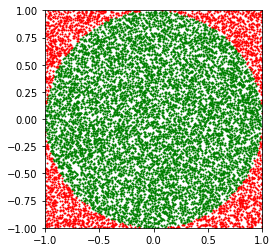

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline  
fig, ax = plt.subplots()

plt.scatter(acc_x, acc_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot
plt.scatter(rej_x, rej_y, color = 'red', s = 1)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()

## Παραδοτέο 2

Συνεχίζοντας στο jupyter notebook που ανοίξατε για το Παραδοτέο 1, απαντήστε τα παρακάτω ερωτήματα.

#### Ερώτημα 1

Θεωρήστε $N=10^6$ δείγματα στον κύβο με κέντρο το (0,0,0) και πλευρά 2. Τροποποιήστε τους δοσμένους κώδικες ώστε να εκτιμήσετε αριθμητικά τον όγκο της μοναδιαίας σφαίρας σε 3 διαστάσεις και συγκρίνετε με τη θεωρητική τιμή $V(3) = \frac{4 \pi}{3}$. Ο κώδικάς σας θα πρέπει να τυπώνει την εκτιμώμενη τιμή του $V(3)$, τη θεωρητική του τιμή και το σχετικό σφάλμα της εκτίμησης.  


#### Ερώτημα 2

Τροποποιήστε τους δοσμένους κώδικες ώστε να πάρετε ένα δείγμα $N=10.000$ σημείων με ομοιόμορφη κατανομή στον λημνίσκο  

$$L = \{(x, y) \in \mathbb{R}^2: {\left(x^2 + y^2 \right)}^2 \leq 2|xy|\, \}$$

Ο κώδικάς σας θα πρέπει επίσης 

1. να κατασκευάζει ένα διάγραμμα όπου τα σημεία που απορρίψατε και τα σημεία του $L$ θα φαίνονται με διαφορετικό χρώμα 
2. να επιστρέφει το πλήθος των δειγμάτων στο $S$ που χρειάστηκαν για την παραγωγή $N$ δειγμάτων στον λημνίσκο $L$ 

#### Ερώτημα 3

Γράψτε έναν κώδικα που εκτιμά το εμβαδόν του λημνίσκου $L$ και την τιμή του ολοκληρώματος

$$ I = \iint_{L}\, |x + y| \, {dxdy} $$

(Υπόδειξη: Αν $X=(X_1,X_2)$ είναι ένα τυχαίο διάνυσμα με ομοιόμορφη κατανομή στον λημνίσκο $L$, τότε η ποσότητα $I/|\, L\,|$ είναι η μέση τιμή $\mathbb{E}\big[\,|\,X_1+X_2\,|\,\big]$. Όταν μπορούμε να φανταστούμε κάτι ως μέση τιμή, τότε μπορούμε να το εκτιμήσουμε αριθμητικά με Monte Carlo.)



